In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the excel sheet into a Dataframe
xls_file = pd.ExcelFile("../UW_Churn_Pred_Data.xls")
print(f"Sheet Names: {xls_file.sheet_names}")
#print(type(xls_file.sheet_names))

# Create a dataframe of the 'Data' sheet
df = pd.read_excel(xls_file, sheet_name="Data")

Sheet Names: ['Data', 'Legend', 'N10', 'B30 Pro', 'Data Before Feb 13']


In [3]:
columns = df.columns
print(columns)

Index(['Sale Channel', 'Model', 'Warranty', 'Feedback', 'Verification',
       'Defect / Damage type', 'Responsible Party', 'Type',
       'Spare Parts Used if returned', 'Final Status',
       'Customer Service Requested', 'Number of Sim', 'Sim Country', 'Slot 1',
       'Slot 2', 'Sim Card', 'Screen Usage (s)', 'App Uage (s)',
       'Bluetooth (# of pairs)', 'Wifi/Internet Connection', 'Wallpaper',
       'Registered Email', 'last boot - activate', 'last boot - interval',
       'interval date', 'last bootl date', 'activate date', 'Age Range'],
      dtype='object')


In [4]:
# test if you can have a list of dictionaries become a df
test_one = [
    {'Whatsapp': 50, 'Tiktok': 500}, {'Test': 100}
]
one_df = pd.DataFrame(test_one)
print(one_df.head())

# test if you can combine lists and make a df
app_names = ['Tiktok', 'Youtube', 'Instagram']
app_times = [100, 200, 300]

test_two = dict(zip(app_names, app_times))
test_one.append(test_two)

print(test_one)
df_two = pd.DataFrame(test_one)
df_two = df_two.fillna(0).astype(int)
print(df_two.head())

   Whatsapp  Tiktok   Test
0      50.0   500.0    NaN
1       NaN     NaN  100.0
[{'Whatsapp': 50, 'Tiktok': 500}, {'Test': 100}, {'Tiktok': 100, 'Youtube': 200, 'Instagram': 300}]
   Whatsapp  Tiktok  Test  Youtube  Instagram
0        50     500     0        0          0
1         0       0   100        0          0
2         0     100     0      200        300


In [5]:
# We can see the 5 most used apps on each device
# but currently it's a list of strings (not seperated by app)
customer_apps_used = df['App Uage (s)'].tolist()
print("initial format: " + customer_apps_used[0])

# Reformat customer_apps_used so that each row is a dictionary containing the app and seconds used
i = 0
for app_time_list in customer_apps_used:
    # current format: ['Whats app 500s, Tiktok 30000s, Youtube 124s, App4 100s, App5 12s', '', '']
    # may be a 0 in this column if no data for the device
    if app_time_list == 0:
        customer_apps_used[i] = {'none': 0}
        i += 1
        continue

    # first split by comma to seperate out each app
    apps_list = app_time_list.split(", ")

    # format of apps_list: [['Whats app 500s', 'Tiktok 30000s', Youtube 124s'], [], []]
    # split each app into a name and use time, and add to correct list
    app_names = []
    app_times = []
    for app in apps_list:
        app_info = app.split(" ")
        app_names.append(app_info[0])
        app_times.append(int(app_info[1][:-1]))

    # zip together the names and times lists & create a dictionary
    apps = dict(zip(app_names, app_times))
    
    # each customer row now holds a dictionary of their 5 most used apps and the times
    customer_apps_used[i] = apps
    i += 1

print("final format: " + str(customer_apps_used[0]))

initial format: Wechat 3021s, Whatsapp 2463s, Youtube 576s, Twitter 2062s, Email 1519s
final format: {'Wechat': 3021, 'Whatsapp': 2463, 'Youtube': 576, 'Twitter': 2062, 'Email': 1519}


In [6]:
# Create a dataframe for the apps and their usage, default val = 0
app_df = pd.DataFrame(customer_apps_used)
app_df = app_df.fillna(0).astype(int)
print(app_df.head())

   Wechat  Whatsapp  Youtube  Twitter  Email  Instagram  Snapchat  Tiktok  \
0    3021      2463      576     2062   1519          0         0       0   
1    5847       830        0        0      0       4992      5419     366   
2       0     15464        0        0   4574          0     18050    4913   
3    8959         0     4572     4177      0          0         0    7711   
4       0      9833     6296        0   8597          0         0    5613   

   Facebook  none  
0         0     0  
1         0     0  
2       903     0  
3     15992     0  
4      4446     0  


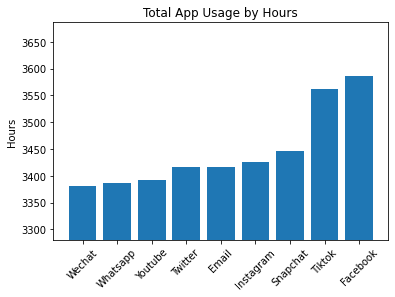

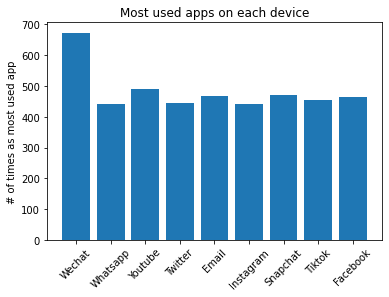

In [7]:
# Figure out total usage time by app, most used apps, 
#    most common most used app (this may help remove outliers who used one app for a very long time)

# Total usage by app
apps = list(app_df.columns[:-1]) # removing 'none'
app_sums = []
app_sums_hrs = []
for app in apps:
    app_sums.append(app_df[f'{app}'].sum())
    app_sums_hrs.append(app_df[f'{app}'].sum() / 3600)

app_sums.sort()
app_sums_hrs.sort()
app_usage_dict = dict(zip(apps, app_sums_hrs))
#print(app_usage_dict)
#for app, time in zip(apps, app_sums_hrs):
    #print(f'{app}: {time:,.1f} hours used across all devices')


# Most common most used app
max_values = app_df.max(axis=1)
max_values_colname = app_df.idxmax(axis=1)

common_fav_apps_dict = {count: 0 for count in apps}
for app_name in max_values_colname:
    common_fav_apps_dict[app_name] += 1
#print(common_fav_apps_dict)

# Create some visualizations
plt.bar(range(len(app_usage_dict)), list(app_usage_dict.values()), align='center')
plt.xticks(range(len(app_usage_dict)), list(app_usage_dict.keys()), rotation=45)
plt.ylim(min(app_usage_dict.values()) - 100, max(app_usage_dict.values()) + 100)
plt.title("Total App Usage by Hours")
plt.ylabel("Hours")
plt.show()

plt.bar(range(len(common_fav_apps_dict)), list(common_fav_apps_dict.values()), align='center')
plt.xticks(range(len(common_fav_apps_dict)), list(common_fav_apps_dict.keys()), rotation=45)
plt.ylabel("# of times as most used app")
plt.title("Most used apps on each device")
plt.show()